In [1]:
## 1. 필요한 모듈 import하기
#
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
check = True

In [3]:
## 2. 데이터 준비
#
digits = load_digits()

In [4]:
feature_data = digits.data  #Feature Data 지정하기
label_data = digits.target  #Label Data 지정하기
print(digits.target_names)  #Target Names 출력해 보기
print(digits.DESCR) #데이터 Describe 해 보기

[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels a

img의 사이즈는 : 8x8입니다


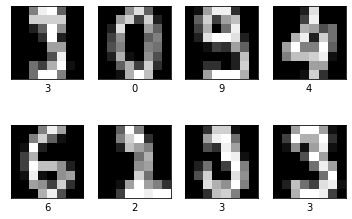

In [5]:
## 3. 데이터 이해하기
#
if check:
    fig = plt.figure()
    ran_idxes = np.arange(len(feature_data))
    np.random.shuffle(ran_idxes)
    img_size = int(np.sqrt(len(feature_data[0])))
    print("img의 사이즈는 : {}x{}입니다".format(img_size, img_size))

    for i in range(8):
        ax= fig.add_subplot(2, 4, i+1)
        ax.imshow(feature_data[ran_idxes[i]].reshape(img_size,img_size), cmap='gray')
        ax.set_xlabel(str(label_data[ran_idxes[i]]))
        ax.set_xticks([]), ax.set_yticks([])
    plt.show()

In [6]:
## 4. train, test 데이터 분리
#
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=random.randrange(1004))
print("data len: {}\ntrain len: {}, test len: {}".format(len(feature_data), len(x_train), len(x_test)))  #데이터 길이 확인

data len: 1797
train len: 1437, test len: 360


In [7]:
## 5. 다양한 모델로 학습시켜보기
#
models = []
#Decision Tree
decision_tree = DecisionTreeClassifier(random_state=32)
models.append(decision_tree)
decision_tree.fit(x_train, y_train)

#Random Forest
random_forest = RandomForestClassifier(random_state=32)
models.append(random_forest)
random_forest.fit(x_train, y_train)

#Support Vector Machine (SVM)
svm_model = svm.SVC()
models.append(svm_model)
svm_model.fit(x_train, y_train)

#Stochastic Gradient Descent Classifier (SGDClassifier)
sgd_model = SGDClassifier()
models.append(sgd_model)
sgd_model.fit(x_train, y_train)

#Logistic Regression
logistic_model = LogisticRegression(solver='lbfgs', max_iter=5000)
models.append(logistic_model)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

사이킷런의 LogisticRegression 모듈을 import해서 사용한 후에 위와 같은 에러
창이 떴다. 에러 내용에 Increase the number of iterations max_iter or scal
e the data as shown in ~ 이라는 문구가 있는 걸 봐서는
  - 반복 횟수의 max를 크게 해주면 된다.

In [8]:
## 6. 모델을 평가해보기
#
y_pred = []
for i in models:
    y_pred.append(i.predict(x_test))

In [9]:
accuracy = [['Decision Tree'], ['Random Forest'], ['SVM'], ['SGDClassifier'], ['Logistic Regression']]
weighted_avg = [['Decision Tree'], ['Random Forest'], ['SVM'], ['SGDClassifier'], ['Logistic Regression']]
for i, y_pred in enumerate(y_pred):
    temp_class_report = classification_report(y_test, y_pred, output_dict=True)
    accuracy[i].append(temp_class_report['accuracy'])
    weighted_avg[i].append(temp_class_report['weighted avg']['f1-score'])

In [10]:
#print("accuracy: ", accuracy)
print("weighted avg f1 socre \n:", weighted_avg)
model_name, acc = max(weighted_avg, key=lambda k : k[1])
print("model = {}, weigted_avg = {:.3f}인 사용하면 더 좋을 것 같다.".format(model_name, acc))
model_num = [i for i in range(len(weighted_avg)) if weighted_avg[i][0]==model_name]

weighted avg f1 socre 
: [['Decision Tree', 0.8656897721260415], ['Random Forest', 0.9749123510503708], ['SVM', 0.9833073985656146], ['SGDClassifier', 0.9453871493642872], ['Logistic Regression', 0.9694277440407066]]
model = SVM, weigted_avg = 0.983인 사용하면 더 좋을 것 같다.


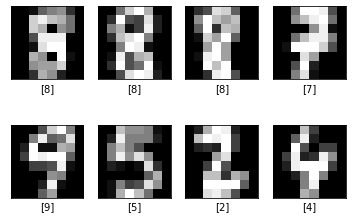

In [11]:
if check:
    fig = plt.figure()
    ran_idxes = np.arange(len(x_test))
    np.random.shuffle(ran_idxes)
    img_size = int(np.sqrt(len(x_test[0])))
    for i in range(8):
        ax= fig.add_subplot(2, 4, i+1)
        ax.imshow(x_test[ran_idxes[i]].reshape(img_size,img_size), cmap='gray')
        ax.set_xlabel(str(models[model_num[-1]].predict(x_test[ran_idxes[i]].reshape(-1, len(x_test[0])))))
        ax.set_xticks([]), ax.set_yticks([])
    plt.show()
#Micro Average(average)는 각각의 TP, FN, FP, TN값들을 모두 합친 total TP, total FN, total FP, total TN값들을 이용해 계산
#Macro Average는 각각의 class에 따라 TP, FN, FP, TN값들을 이용해서 평가 지표를 계산한 후 그 값들의 평균을 사용
#Weighted Average는 각 class에 해당하는 data의 개수에 가중치를 주어 평균
#F1 score는 Recall과 Precision의 조화평균이므로 F1 score에 대해 비교해 보겠습니다.